In [1]:
import os
import sys
import pylab as pl
import numpy as np
import matplotlib.pyplot as plt
from   astropy.table import Table

In [2]:
sys.path.append('/global/homes/m/mjwilson/desi/BGS/Sam/DESI/')

In [3]:
from   vmaxer import vmaxer
from   smith_kcorr import test_plots, test_nonnative_plots
from   cosmo import distmod, volcom
from   lumfn import lumfn
from   schechter import schechter

In [4]:
gama_zmax = Table.read(os.environ['CSCRATCH'] + '/norberg//GAMA4/gama_gold_zmax.fits')
gama_zmax

CATAID,OBJID,RA,DEC,R_PETRO,ZGAMA,NQ,SPECID,SURVEY_CLASS,UMAG_DRED_SDSS,GMAG_DRED_SDSS,RMAG_DRED_SDSS,IMAG_DRED_SDSS,ZMAG_DRED_SDSS,LUMDIST,DISTMOD,GMR,REST_GMR_0P1,REST_GMR_0P1_WARN,REST_GMR_0P1_INDEX,KCORR_R0P1,KCORR_G0P1,KCORR_R0P0,KCORR_G0P0,REST_GMR_0P0,Q_COLOR_0P0,EQ_ALL_0P0,EQ_COLOR_0P0,MALL_0P0,MCOLOR_0P0,Z_THETA_QALL,Z_THETA_QCOLOR,DELTA_RPETRO_FAINT,ZMAX,ZMAX_WARN,DELTA_RPETRO_BRIGHT,ZMIN,ZMIN_WARN
,,deg,deg,mag,,,,,mag,mag,mag,mag,mag,,,mag,,,,,,,,mag,mag,,,mag,mag,,,mag,,,mag,,
int32,int64,float64,float64,float32,float32,int16,bytes33,int16,float32,float32,float32,float32,float32,float64,float64,float32,float64,int64,int64,float64,float64,float64,float64,float64,float64,float32,float32,float64,float64,float64,float64,float32,float64,float64,float32,float64,float64
386805,587727944563819000,134.01009244,2.32209878,18.999538,0.19489,4,G09_Y2_021_192,6,21.098183,19.805834,19.002657,18.573671,18.334898,671.3846300853444,39.1348569739141,0.8031769,0.6207474460688747,0,4,-0.043401164231396824,0.13902826958254105,0.1745780060255559,0.4107686751775556,0.5669862107308128,2.12,-0.18904331,-0.4131668,-20.120853245043946,-19.896729767108155,39.120391666674806,38.896268188739015,0.8004608,0.28464481687367604,0.0,-6.9995384,0.007955196992671823,0.0
196108,587725073914003977,129.40701904,-0.70191331,19.317492,0.1769,4,G09_Y2_019_103,6,20.896608,19.965784,19.284044,18.873354,18.67871,602.5196376086117,38.899856031056714,0.6817398,0.5468141266713421,0,4,-0.06938452547299719,0.06554115498456703,0.13781159009089128,0.31130577871524984,0.5082456185045476,2.12,-0.17159301,-0.37502798,-19.548583079349967,-19.345148105394813,38.86607461072204,38.66263963676688,0.4825077,0.22304376921442798,0.0,-7.3174915,0.006176633539799811,0.0
3581319,587729150375362743,132.22724598,-1.52302925,17.708998,0.21845,4,G09_Y4_227_197,6,19.991367,18.631165,17.707405,17.242115,16.91901,763.5372292561811,39.4141510882087,0.92375946,0.6722014342809547,0,4,-0.015126542544098703,0.23643148362416533,0.20636152599301677,0.5272372237588918,0.6028837626833436,2.12,-0.2118965,-0.46311396,-21.699618393730333,-21.448400924157312,39.40861612017076,39.15739865059774,2.0910015,0.5321657569147775,0.0,-5.7089977,0.01619295108168265,0.0
3583283,587729150375821538,133.29179777,-1.62363597,19.004656,0.07737,4,G09_Y4_239_058,6,20.095257,19.215954,19.001188,18.822033,18.742218,246.19238260163945,36.95637305684218,0.21476555,0.2327932438664232,0,2,-0.10164614078540275,-0.11967383594552983,0.06312904423149192,0.03171773689897445,0.24617685603857214,2.12,-0.07504891,-0.1640244,-17.939797354469707,-17.85082186533015,36.944453192482406,36.85547770334285,0.7953434,0.11292987662789934,0.0,-7.004656,0.0031081360358404123,0.0
301894,587726032229105915,135.59405392,1.2824009,16.884815,0.13108,5,528210091002849280,6,20.099348,17.841904,16.780191,16.346266,15.997567,433.17604316774094,38.183322149649214,1.0617123,0.9774386323843438,0,6,-0.060613110767923827,0.023660521862380823,0.1706670944326003,0.4173594637694922,0.8150198956777566,0.8,-0.1271476,-0.104864,-21.342026427962622,-21.364310026743254,38.226841644027076,38.24912524280771,2.915184,0.38860801596886707,0.0,-4.884815,0.015471772499660577,0.0
418145,587728879258239301,135.12374329,2.57136785,18.704964,0.12964,4,G09_Y1_DX2_383,6,20.994415,19.530191,18.758545,18.315557,18.036816,427.99808211047826,38.157209114567,0.7716465,0.7167258705330736,0,5,-0.07574448305343172,-0.02082385395271634,0.14877992383604488,0.286479601943904,0.63394682152593,0.8,-0.1257508,-0.103712,-19.475274559314265,-19.497313354368224,38.180238243396296,38.202277038450255,1.0950356,0.20426831744798465,0.0,-6.7049637,0.006598485845515141,0.0
569269,588848899392667895,218.52591376,-0.42654574,19.378517,0.22188,4,G15_Y3_033_178,6,21.855558,20.410545,19.39021,18.927923,18.596373,777.1363735519409,39.452486182062515,1.0203362,0.740540917017054,0,5,0.008442750412102878,0.2882379845180956,0.23459122141309607,0.6043656704515488,0.6505617020845942,0.8,-0.21522361,-0.177504,-

In [6]:
gama_vmax = Table.read(os.environ['CSCRATCH'] + '/norberg//GAMA4/gama_gold_vmax.fits')
gama_vmax

ZGAMA,ZMIN,ZMAX,MCOLOR_0P0,VMAX,VZ
,,,mag,,
float32,float64,float64,float64,float64,float64
0.19489,0.03903000056743622,0.26298999786376953,-19.896729767108155,7594841.842906503,3213540.202080313
0.1769,0.03903000056743622,0.22304376921442798,-19.345148105394813,4744480.2327530915,2423819.899631298
0.21845,0.03903000056743622,0.26298999786376953,-21.448400924157312,7594841.842906503,4468890.563670888
0.07737,0.03903000056743622,0.11292987662789934,-17.85082186533015,635194.7011307261,189455.44383488595
0.13108,0.03903000056743622,0.26298999786376953,-21.364310026743254,7594841.842906503,998008.3551280069
0.12964,0.03903000056743622,0.20426831744798465,-19.497313354368224,3682207.0915358975,965422.7798028872
0.22188,0.03903000056743622,0.26242798487028474,-20.131056249548763,7548868.367545325,4673684.697095223
0.1052,0.03903000056743622,0.1478515957436512,-18.506521074289658,1429470.252629071,510520.54314400506


Text(0.5, 0, 'ZMAX')

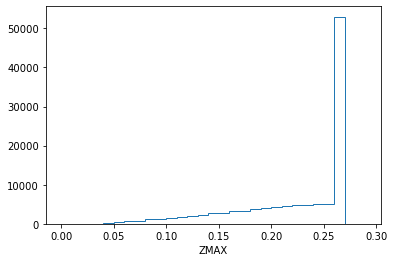

In [8]:
_ = pl.hist(gama_vmax['ZMAX'], bins=np.arange(0.0, 0.3, 0.01), histtype='step')
pl.xlabel('ZMAX')

In [9]:
np.unique(gama_vmax['ZMIN'].data)

array([0.03903   , 0.03981007])

Text(0, 0.5, 'ZMAX')

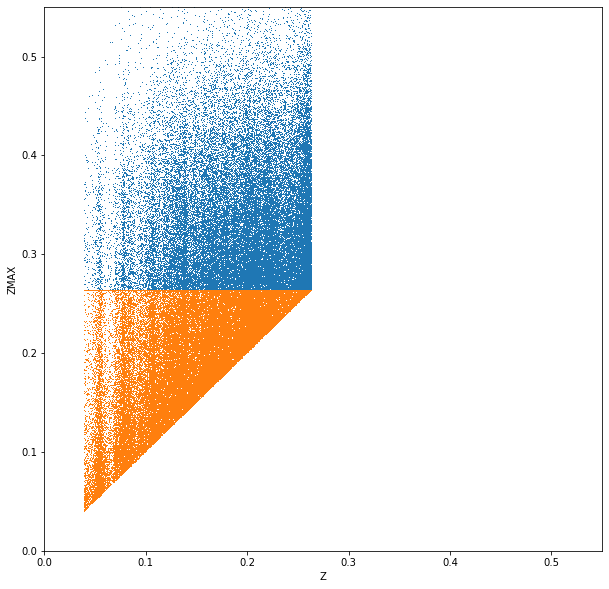

In [11]:
fig, ax = plt.subplots(1,1,figsize=(10,10))

ax.plot(gama_zmax['ZGAMA'], gama_zmax['ZMAX'], marker=',', lw=0.0)
ax.plot(gama_vmax['ZGAMA'], gama_vmax['ZMAX'], marker=',', lw=0.0)
'''
ax.axvline(zmin, c='k', lw=0.5) 
ax.axvline(zmax, c='k', lw=0.5) 

ax.axhline(zmin, c='k', lw=0.5) 
ax.axhline(zmax, c='k', lw=0.5) 
'''
ax.set_xlim(0.0, 0.55)
ax.set_ylim(0.0, 0.55)

ax.set_xlabel('Z')
ax.set_ylabel('ZMAX')

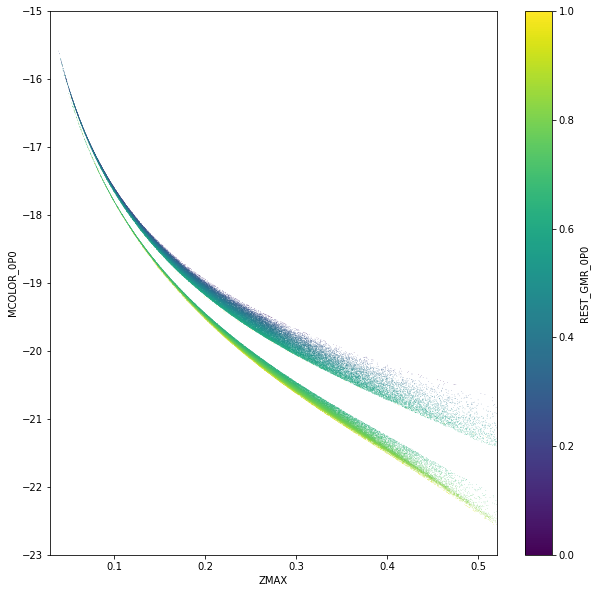

In [12]:
fig, ax = plt.subplots(1,1,figsize=(10,10))

sc=ax.scatter(gama_zmax['ZMAX'], gama_zmax['MCOLOR_0P0'], marker='.', lw=0.0, s=1, c=gama_zmax['REST_GMR_0P0'], vmin=0.0, vmax=1.0)
# ax.plot(gama_vmax['ZMAX'], gama_vmax['MCOLOR_0P0'], marker=',', lw=0.0)

ax.set_xlim(0.03, 0.52)
ax.set_ylim(-23., -15.)

ax.set_xlabel('ZMAX')
ax.set_ylabel('MCOLOR_0P0')

plt.colorbar(sc, label='REST_GMR_0P0')

Text(0, 0.5, 'DEC')

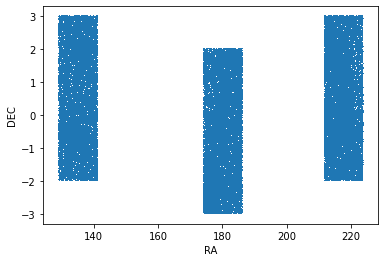

In [29]:
pl.plot(gama_zmax['RA'], gama_zmax['DEC'], marker=',', lw=0.0)

pl.xlabel('RA')
pl.ylabel('DEC')

In [30]:
gama_lf = Table.read(os.environ['CSCRATCH'] + '/norberg//GAMA4/gama_gold_lumfn.fits')
gama_lf

MEDIAN_M,PHI_N,PHI_N_ERROR,PHI_IVMAX
float64,float64,float64,float64
-23.42293176064758,4.388943709797751e-07,4.388943709797751e-07,4.389948126873385e-07
-23.111724644989394,8.777887419595502e-07,6.206903718888066e-07,8.777887419595503e-07
-22.911188045606362,5.7056268227370755e-06,1.5824561590800933e-06,5.7056268227370755e-06
-22.642112086773523,3.950049338817976e-05,4.163717593568987e-06,3.950049338817975e-05
-22.312444870955268,0.00012771826195511455,7.486977109850151e-06,0.00012771826195511453
-22.018914188433687,0.000327854095121892,1.1995554045214675e-05,0.0003278540951218919
-21.722028909789106,0.0007540205293432536,1.819162900709951e-05,0.0007540205293432535
-21.434067411608222,0.00148302407954066,2.551256397420412e-05,0.0014830240795406598
-21.13374389191792,0.002429280343373055,3.265267934241e-05,0.0024292803433730546


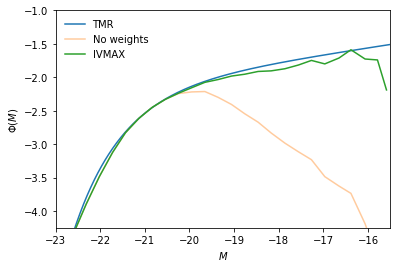

In [32]:
Ms = np.arange(-23., -15., 0.01)
sc = schechter(Ms, named_type='TMR')

pl.plot(Ms, np.log10(sc), label='TMR')

pl.plot(gama_lf['MEDIAN_M'], np.log10(gama_lf['PHI_N']), label='No weights', alpha=0.4)
pl.plot(gama_lf['MEDIAN_M'], np.log10(gama_lf['PHI_IVMAX']), label='IVMAX')

pl.xlabel(r'$M$')
pl.ylabel(r'$\Phi(M)$')

pl.ylim(-4.25, -1.)
pl.xlim(-23., -15.5)

pl.legend(frameon=False, loc=2)

Text(0.5, 0, '(V/VMAX)')

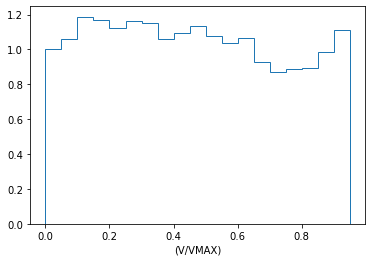

In [33]:
_ = pl.hist(gama_vmax['VZ'] / gama_vmax['VMAX'], bins=np.arange(0.0, 1.0, 0.05), histtype='step', density=True)
pl.xlabel('(V/VMAX)')

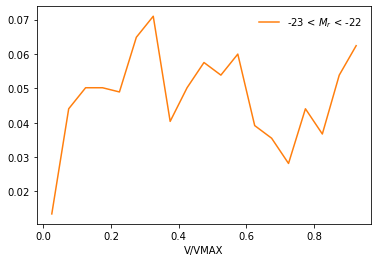

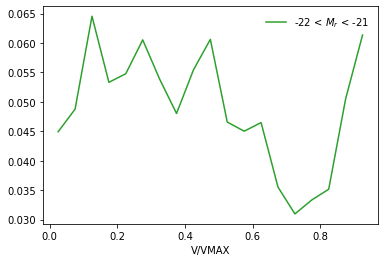

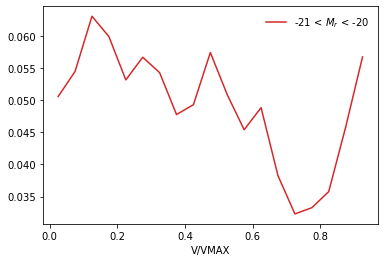

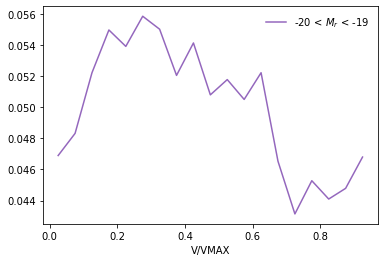

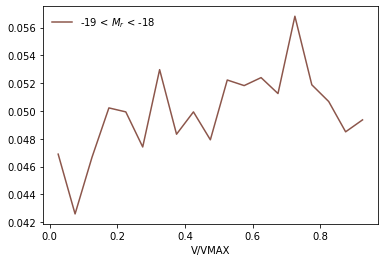

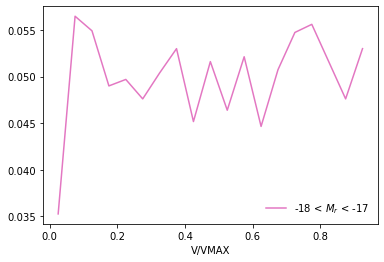

In [34]:
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
idx    = np.digitize(gama_vmax['MCOLOR_0P0'], np.arange(-23., -17., 1.))

for count, jj in enumerate(np.unique(idx)):
    sample = gama_vmax[(idx == jj) & (gama_vmax['MCOLOR_0P0'].data >= -23.) & (gama_vmax['MCOLOR_0P0'].data <= -17.)]
    nsample = len(sample)

    if nsample == 0:
        continue
    
    dbin = 0.05
    bins = np.arange(0., 1.0, dbin)
    
    ns, _ = np.histogram(sample['VZ'] / sample['VMAX'], bins=bins)
    
    centres = bins[:-1] + dbin/2.
    
    plt.plot(centres, ns / nsample, color=colors[count], label=r'{:.0f} < $M_r$ < {:.0f}'.format(sample['MCOLOR_0P0'].min(),\
                                                                                                 sample['MCOLOR_0P0'].max()))

    plt.xlabel('V/VMAX')
    plt.legend(frameon=False)
    
    pl.show()

In [35]:
spurious = gama_zmax[gama_zmax['ZMAX_WARN'] > 0.0]
spurious.sort('R_PETRO')
spurious

CATAID,OBJID,RA,DEC,R_PETRO,ZGAMA,NQ,SPECID,SURVEY_CLASS,UMAG_DRED_SDSS,GMAG_DRED_SDSS,RMAG_DRED_SDSS,IMAG_DRED_SDSS,ZMAG_DRED_SDSS,LUMDIST,DISTMOD,GMR,REST_GMR_0P1,REST_GMR_0P1_WARN,REST_GMR_0P1_INDEX,KCORR_R0P1,KCORR_G0P1,KCORR_R0P0,KCORR_G0P0,REST_GMR_0P0,Q_COLOR_0P0,EQ_ALL_0P0,EQ_COLOR_0P0,MALL_0P0,MCOLOR_0P0,Z_THETA_QALL,Z_THETA_QCOLOR,DELTA_RPETRO_FAINT,ZMAX,ZMAX_WARN,DELTA_RPETRO_BRIGHT,ZMIN,ZMIN_WARN
,,deg,deg,mag,,,,,mag,mag,mag,mag,mag,,,mag,,,,,,,,mag,mag,,,mag,mag,,,mag,,,mag,,
int32,int64,float64,float64,float32,float32,int16,bytes33,int16,float32,float32,float32,float32,float32,float64,float64,float32,float64,int64,int64,float64,float64,float64,float64,float64,float64,float32,float32,float64,float64,float64,float64,float32,float64,float64,float32,float64,float64
185322,587725041702469675,179.83440251,-1.64817036,14.160493,0.08135,5,372775163474765824,6,17.064615,15.692654,14.905519,14.343366,14.213043,259.6079029836754,37.07158954561004,0.7871351,0.8222150124783408,0,5,-0.12544319185352298,-0.160523080125354,0.10303089196510218,0.18560737233721386,0.7045586438344313,0.8,-0.0789095,-0.06508,-22.935218039108076,-22.949047538591184,37.09571093614177,37.10954043562488,5.6395063,-99.0,2.0,-2.160493,0.03154120966707457,0.0
178839,587725041166581794,182.1835035,-2.07231294,14.328211,0.10734,4,G12_Y6_041_249,6,24.575645,17.823496,16.785114,15.850774,18.088587,348.95950671254064,37.71387517159247,1.0383816,1.0190980480456595,0,6,-0.09298329526027885,-0.07369976676785223,0.14283969236353414,0.32678700770193425,0.8544342611996858,0.8,-0.1041198,-0.085872,-23.424384233236342,-23.442632031321555,37.75259506392482,37.770842862010035,5.4717884,-99.0,2.0,-2.3282108,0.039334234229219986,0.0
125489,587724649258876969,184.17810296,-2.69967347,14.425353,0.25162,4,G12_Y4_203_103,6,15.559951,15.755173,14.309496,28.205227,16.762774,896.959179230692,39.76386339337955,1.4456768,0.9922763000644923,0,6,0.11573660675273972,0.5691371102771148,0.34863479662419555,0.9652536473961288,0.829057952816934,0.8,-0.24407141,-0.201296,-25.44307373066556,-25.48584913809907,39.868426780897494,39.911202188331,5.374646,-99.0,2.0,-2.425353,0.09538586652718395,0.0
718921,587726031728017438,217.2773885,1.28502947,14.456577,0.08647,3,NED_MRK_1383,4,14.399254,14.418312,14.378856,13.8610735,14.046887,276.97126444400743,37.212173568413235,0.039456367,0.05020904994649686,0,1,-0.0982779198530405,-0.10903060230686158,0.06300279945333358,0.018814009181763167,0.08364515776424619,2.12,-0.0838759,-0.1833164,-22.734723164844088,-22.635282672154478,37.19130046586948,37.09185997317987,5.343422,1.1327447246183497,1.0,-2.4565773,0.027777561711799695,0.0
423776,587728879796093009,137.38205797,2.9559053,14.904024,0.14906,4,G09_Y1_FX1_283,6,16.738531,15.69086,14.949677,14.424865,14.620418,498.5745074806278,38.488650344529816,0.7411823,0.6530574215121244,0,4,-0.0658698376204572,0.022255068137926215,0.15431270736417704,0.30596734437310263,0.5895276902615822,2.12,-0.1445882,-0.31600717,-23.594350725510402,-23.42293176064758,38.49837484965591,38.32695588479309,4.895975,1.0458491090380895,1.0,-2.9040241,0.03981006674260368,0.0
402898,587728308032700482,177.930413,1.9912852,15.154907,0.07667,5,579904457131714560,6,16.842907,15.722559,15.199033,14.873966,14.68127,243.84026700789565,36.935527126086086,0.5235262,0.549579180178585,0,4,-0.1197763995197219,-0.14582938798677653,0.08788865133758171,0.10089048529106931,0.5105243577579381,2.12,-0.0743699,-0.16254039,-21.7941386509326,-21.705968159773636,36.949045877495095,36.86087538633613,4.645092,0.6363174309306602,1.0,-3.1549072,0.01821402409100862,0.0
55245,587722982814318600,181.07946541,-0.31550504,15.221583,0.0936,4,2dF297003,6,17.229362,15.708232,15.173567,14.923664,14.695865,301.34716051886954,37.39533551814698,0.5346651,0.542607287963911,0,4,-0.10747037662389142,-0.11541255686075166,0.09901228614841384,0.12889872039409075,0.5047786734813738,2.12,-0.090792,-0.19843198,-22.18197243760762,-22.074332454311225,37.40355580400166,37.2959158

In [36]:
spurious = gama_zmax[gama_zmax['ZMIN_WARN'] > 0.0]
spurious.sort('R_PETRO')
spurious

CATAID,OBJID,RA,DEC,R_PETRO,ZGAMA,NQ,SPECID,SURVEY_CLASS,UMAG_DRED_SDSS,GMAG_DRED_SDSS,RMAG_DRED_SDSS,IMAG_DRED_SDSS,ZMAG_DRED_SDSS,LUMDIST,DISTMOD,GMR,REST_GMR_0P1,REST_GMR_0P1_WARN,REST_GMR_0P1_INDEX,KCORR_R0P1,KCORR_G0P1,KCORR_R0P0,KCORR_G0P0,REST_GMR_0P0,Q_COLOR_0P0,EQ_ALL_0P0,EQ_COLOR_0P0,MALL_0P0,MCOLOR_0P0,Z_THETA_QALL,Z_THETA_QCOLOR,DELTA_RPETRO_FAINT,ZMAX,ZMAX_WARN,DELTA_RPETRO_BRIGHT,ZMIN,ZMIN_WARN
,,deg,deg,mag,,,,,mag,mag,mag,mag,mag,,,mag,,,,,,,,mag,mag,,,mag,mag,,,mag,,,mag,,
int32,int64,float64,float64,float32,float32,int16,bytes33,int16,float32,float32,float32,float32,float32,float64,float64,float32,float64,int64,int64,float64,float64,float64,float64,float64,float64,float32,float32,float64,float64,float64,float64,float32,float64,float64,float32,float64,float64


# Done.